<h1 align=center><font size=8>Airbnb: New York City 2019 Dataset</font></h1>

<h1 align=center><font size=5>Overview</font></h1>

Objectives: 
* Import Libraries 
* Set up dataframe 
* Explore Dataset 
* Address Missing Values 
* Check Data Format 
* Data Standardization
* Check for Normalization 
* Data Binning 

In [298]:
#Author - Sahil Kohli 
#Contact - sah.kohli11@gmail.com OR sahilkoh@usc.edu 
#Import libraries 

import pandas as pd #pandas 
import numpy as np #numpy 
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns #seaborn 
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

In [5]:
%matplotlib inline

In [6]:
#importing our dataframe
import_df = pd.read_csv('../Desktop/Datasets/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [8]:
#measuring our rows and columns 
#48,895 rows x 16 columns 
import_df.shape

(48895, 16)

In [9]:
#glimpse of our dataset 
import_df.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [13]:
#Initial Check of Data Types 
import_df.dtypes
#Off an initial glance, it seems as though all of our data types are in the correct format alrady. 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [15]:
#A brief statistical overview of each one of our 16 features. 
import_df.describe(include='all')

id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47905           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       417   
mean    1.901714e+07             NaN  6.762001e+07       NaN   
std     1.098311e+07             NaN  7.861097e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.471945e+06             NaN  7.822033e+06       NaN   
50%     1.967728e+07             NaN  3.079382e+07       NaN   
75%     2.915218e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
unique                   5           221           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 21661          3920           NaN           NaN   
mean                   NaN           NaN     40.728949    -73.952170   
std                    NaN           NaN      0.054530      0.046157   
min                    NaN           NaN     40.499790    -74.244420   
25%                    NaN           NaN     40.690100    -73.983070   
50%                    NaN           NaN     40.723070    -73.955680   
75%                    NaN           NaN     40.763115    -73.936275   
max                    NaN           NaN     40.913060    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             48895  48895.000000    48895.000000       48895.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              25409           NaN             NaN                NaN   
mean                NaN    152.720687        7.029962          23.274466   
std                 NaN    240.154170       20.510550          44.550582   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          24.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        38843       38843.000000                    48895.000000   
unique        1764                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq          1413                NaN                             NaN   
mean           NaN           1.373221                        7.143982   
std            NaN           1.680442                       32.952519   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.720000                        1.000000   
75%            NaN           2.020000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       48895.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.781327  
std           131.622289  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           227.000000  
max           365.000000

<h3> Dealing with Missing Values </h3> 

I will at some important features and how we can deal with missing data effectively and strategically. 

It is evident from our ouput above that we have a series of missing values here. It seems as though there are missing in both types of variables 1. Categorical 2. Numerical. The first action we want to do is convert all of our missing data to Python's standard NaN (Not a Number) characterization. It looks like this dataset already uses <i> NaN </i>, but just to ensure I will perform this action again. 

Steps: 
1. Convert all missing data to Python's NaN standard format 
2. Count all the null values in each column 
3. Devise a strategy to deal with the null values in each column 


In [17]:
#Just to Double Check any Blank Columns have NaN 
import_df.replace('',np.nan, inplace=True)


In [29]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [19]:
import_df.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [21]:
#Set up a dataframe to count the missing values 
missing_data = import_df.isnull() 
missing_data.head(10) 

id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0  False  False    False      False                False          False   
1  False  False    False      False                False          False   
2  False  False    False      False                False          False   
3  False  False    False      False                False          False   
4  False  False    False      False                False          False   
5  False  False    False      False                False          False   
6  False  False    False      False                False          False   
7  False  False    False      False                False          False   
8  False  False    False      False                False          False   
9  False  False    False      False                False          False   

   latitude  longitude  room_type  price  minimum_nights  number_of_reviews  \
0     False      False      False  False           False              False   
1     False      False      False  False           False              False   
2     False      False      False  False           False              False   
3     False      False      False  False           False              False   
4     False      False      False  False           False              False   
5     False      False      False  False           False              False   
6     False      False      False  False           False              False   
7     False      False      False  False           False              False   
8     False      False      False  False           False              False   
9     False      False      False  False           False              False   

   last_review  reviews_per_month  calculated_host_listings_count  \
0        False              False                           False   
1        False              False                           False   
2         True               True                           False   
3        False              False                           False   
4        False              False                           False   
5        False              False                           False   
6        False              False                           False   
7        False              False                           False   
8        False              False                           False   
9        False              False                           False   

   availability_365  
0             False  
1             False  
2             False  
3             False  
4             False  
5             False  
6             False  
7             False  
8             False  
9             False

There are, indeed, some columns which do have missing data. For the most part, however, it seems as though most of the data is filled in. Still, this dataset is large and I will have to double check. 


In [27]:
import_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
#Seting up a function to count the null values in all of our columns 

for i in missing_data.columns.tolist(): 
    print(i)
    print("")
    print()
    print(missing_data[i].value_counts())


id


False    48895
Name: id, dtype: int64
name


False    48879
True        16
Name: name, dtype: int64
host_id


False    48895
Name: host_id, dtype: int64
host_name


False    48874
True        21
Name: host_name, dtype: int64
neighbourhood_group


False    48895
Name: neighbourhood_group, dtype: int64
neighbourhood


False    48895
Name: neighbourhood, dtype: int64
latitude


False    48895
Name: latitude, dtype: int64
longitude


False    48895
Name: longitude, dtype: int64
room_type


False    48895
Name: room_type, dtype: int64
price


False    48895
Name: price, dtype: int64
minimum_nights


False    48895
Name: minimum_nights, dtype: int64
number_of_reviews


False    48895
Name: number_of_reviews, dtype: int64
last_review


False    38843
True     10052
Name: last_review, dtype: int64
reviews_per_month


False    38843
True     10052
Name: reviews_per_month, dtype: int64
calculated_host_listings_count


False    48895
Name: calculated_host_listings_count, dtype: int64
availab

<h3> Missing Data Counts </h3> 

Now, I know the following: 
* <b> name </b>: 16 missing values
* <b> host_id</b> : 21 missing values 
* <b> host_name </b> : 21 missing values 
* <b> reviews_per_month </b> : 10,052 missing values 

In terms of dealing with our missing data, we will have to strategize what we would like to do in order to deal with these missing values. 

<b> Strategy </b> : 
* <b> name: </b> Because name will be important to our overall EDA and visualizations later on, we will need to drop the missing values from the name column. 
* <b> host_id: </b> host_id will not serve a great overall purpose. This is more of an enterprise metric measured by Airbnb. Since each host_id  We can maintain these missing values. 
* <b> host_name: </b> host_nae will not serve a great overall purpose. Also, the missing value counts for host name is not too severe, so we can maintain these missing values. 
* <b> reviews_per_month: </b> In terms of reviews_per_month, this is a numerical value and we cannot simply replace by the mean. We will have to strategize further on the best means to replace these missing_values. Perhaps by the average of each neighborhood, home_type, etc.


In [35]:
#Dropping the name columns null values 
import_df.dropna(subset=['name'])

id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
6          5121                                    BlissArtsSpace!       7356   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
9          5238                 Cute & Cozy Lower East Side 1 bdrm       7549   
10         5295                   Beautiful 1br on Upper West Side       7702   
11         5441                    Central Manhattan/near Broadway       7989   
12         5803     Lovely Room 1, Garden, Best Area, Legal rental       9744   
13         6021   Wonderful Guest Bedroom in Manhattan for SINGLES      11528   
14         6090                      West Village Nest - Superhost      11975   
15         6848                   Only 2 stops to Manhattan studio      15991   
16         7097                  Perfect for Your Parents + Garden      17571   
17         7322                                    Chelsea Perfect      18946   
18         7726    Hip Historic Brownstone Apartment with Backyard      20950   
19         7750                  Huge 2 BR Upper East  Cental Park      17985   
20         7801                   Sweet and Spacious Brooklyn Loft      21207   
21         8024                     CBG CtyBGd HelpsHaiti rm#1:1-4      22486   
22         8025                           CBG Helps Haiti Room#2.5      22486   
23         8110                              CBG Helps Haiti Rm #2      22486   
24         8490             MAISON DES SIRENES1,bohemian apartment      25183   
25         8505                 Sunny Bedroom Across Prospect Park      25326   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres      26394   
27         9357                               Midtown Pied-a-terre      30193   
28         9518       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM      31374   
29         9657                   Modern 1 BR / NYC / EAST VILLAGE      21904   
...         ...                                                ...        ...   
48865  36472171                      1 bedroom in sunlit apartment   99144947   
48866  36472710                                 CozyHideAway Suite  274225617   
48867  36473044    The place you were dreaming for.(only for guys)  261338177   
48868  36473253                       Heaven for you(only for guy)  261338177   
48869  36474023                        Cozy, Sunny Brooklyn Escape    1550580   
48870  36474911      Cozy, clean Williamsburg 1- bedroom apartment    1273444   
48871  36475746      A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER  144008701   
48872  36476675                                      Nycity-MyHome    8636072   
48873  36477307                                  Brooklyn paradise  241945355   
48874  36477588                   Short Term Rental in East Harlem  214535893   
48875  36478343                              Welcome all as family  274273284   
48876  36478357    Cozy, Air-Conditioned Private Bedroom in Harlem  177932088   
48877  36479230             Studio sized room with beautiful light   65767720   
48878  36479723                                      Room for rest   41326856   
48879  36480292  Gorgeous 1.5 Bdr with a private yard- Williams...     540335   
48880  36481315  The Raccoon Artist Studio in Williamsburg New ...  208514239   
48881  36481615                   Peaceful space in Greenpoint, BK  274298453   
48882  36482231                          Bus

In [39]:
#Reset our Indexes Whenever we make a drop change 
#reset_index
import_df.reset_index(drop=True, inplace=True)

<h3> Correcting Data Types & Data Standardization</h3> 

As per the below, I do not have to go ahead and correct any data types at this moment in time. It seems as though the data has been placed in relatively proper format. Still, I will perform preliminary due diligence and change some important variables from type int64 to type float as it might be necessary later on in our analysis. 

In [40]:
import_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [44]:
#Converting Some Data Types 
#Price & Minimum Nunber of Nights 
#Number of Reviews 
#Calculated_host_listing_count 
#Availability_365 

import_df[['price', 'minimum_nights']] = import_df[['price','minimum_nights']].astype('float') #price and minimum number of nights 
import_df[['calculated_host_listing_count','availability_365']] = import_df[['calculated_host_listings_count','availability_365']].astype('float')

In [45]:
#Validate if conversion was successful 
import_df.dtypes 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                  float64
calculated_host_listing_count     float64
dtype: object

In [46]:
#This is what the dataframe now looks like 
import_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0             1.0                  9  2018-10-19   
1  Entire home/apt  225.0             1.0                 45  2019-05-21   
2     Private room  150.0             3.0                  0         NaN   
3  Entire home/apt   89.0             1.0                270  2019-07-05   
4  Entire home/apt   80.0            10.0                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6             365.0   
1               0.38                               2             355.0   
2                NaN                               1             365.0   
3               4.64                               1             194.0   
4               0.10                               1               0.0   

   calculated_host_listing_count  
0                            6.0  
1                            2.0  
2                            1.0  
3                            1.0  
4                            1.0

<h3> Data Standardization </h3> 

Now, I will check to see if any of the data needs to be standardized. First, I will check all the categorical variables that may be relevant: 

* neighbourhood_group 
* neighborhood
* room_type 

In [53]:
data_standardizer_list = import_df[['neighbourhood_group','neighbourhood', 'room_type']]

In [59]:
for i in data_standardizer_list: 
    print(import_df[i].unique())
    print(" ")

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
 
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach

As per the above, there are no lurking discrpencies where we might have to standardize the data. 

<h3> Data Normalization </h3> 

Normalization is th eprocess of transforming the values of several variables into a similar range. Typical normalizations include scaling the variable so the variable variance average is 0, scaling the variable so the variance is 1 or scaling the variable so the variable values range from 0 to 1. 

I will check the continious numerical variables in our dataset and determine if values must, indeed, be normalized in this situation. The only feature I will not transform is price, as this will most likely be our predictor variable. 

Moreover, I will check between the three primary methods of <b> Data Normalization: </b>
* 1.  Simple Feature Scaling 

$$ X_{new} = (X_{old}) / (X_{max}) $$ 

* 2.  Min-Max Method 

$$ X_{new} = (X_{old} - X_{min}) / (X_{max}) $$


* 3.  Z-score Standard Method 

$$ X_{new} = (X_{old} - mean)/ (sd) $$





In [62]:
import_df[['minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

minimum_nights  number_of_reviews  calculated_host_listings_count  \
0                 1.0                  9                               6   
1                 1.0                 45                               2   
2                 3.0                  0                               1   
3                 1.0                270                               1   
4                10.0                  9                               1   
5                 3.0                 74                               1   
6                45.0                 49                               1   
7                 2.0                430                               1   
8                 2.0                118                               1   
9                 1.0                160                               4   
10                5.0                 53                               1   
11                2.0                188                               1   
12                4.0                167                               3   
13                2.0                113                               1   
14               90.0                 27                               1   
15                2.0                148                               1   
16                2.0                198                               1   
17                1.0                260                               1   
18                3.0                 53                               1   
19                7.0                  0                               2   
20                3.0                  9                               1   
21                2.0                130                               6   
22                1.0                 39                               6   
23                2.0                 71                               6   
24                2.0                 88                               2   
25                1.0                 19                               2   
26                4.0                  0                               1   
27               10.0                 58                               1   
28                3.0                108                               3   
29               14.0                 29                               1   
...               ...                ...                             ...   
48865             1.0                  0                               1   
48866             1.0                  0                               1   
48867             1.0                  0                               6   
48868             7.0                  0                               6   
48869             4.0                  0                               1   
48870             4.0                  0                               1   
48871            29.0                  0                               2   
48872             3.0                  0                               1   
48873             1.0                  0                               2   
48874             7.0                  0                               1   
48875             1.0                  0                               1   
48876             1.0                  0                               1   
48877             7.0                  0                               1   
48878             1.0                  0                               5   
48879            20.0                  0                               1   
48880             1.0                  0                               3   
48881             6.0                  0                               1   
48882            20.0                  0                               1   
48883             2.0                  0                               2   
48884             7.0                  0                               1   
48885             2.0                  0               

In [78]:
normalization_list_validation = import_df[['minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

for i in normalization_list_validation: 
    print("The range of the variables of",i,"is:",( normalization_list_validation[i].max())- normalization_list_validation[i].min())
    print(" ")

The range of the variables of minimum_nights is: 1249.0
 
The range of the variables of number_of_reviews is: 629
 
The range of the variables of calculated_host_listings_count is: 326
 
The range of the variables of availability_365 is: 365.0
 


In [83]:
for i in normalization_list_validation: 
    print("The variance of the variables of",i,"is",normalization_list_validation[i].var())
    print(" ")

The variance of the variables of minimum_nights is 420.6826421530485
 
The variance of the variables of number_of_reviews is 1984.7543803009248
 
The variance of the variables of calculated_host_listings_count is 1085.8684985214768
 
The variance of the variables of availability_365 is 17324.426922561302
 


As per the above, the range and the variance on these variables is significant. However, not all the variables are dependent on each other. As a part of my due diligence, I will set up a normalized instance of the two variables here that might be co-dependent: 
* minimum_nights 
* availibility_365 

Thus, I will create a normalized instance of these variables. 

In [97]:
#normalizing our different variables 
#I will normalize only minimum nights and availib
x_array = np.array(import_df['minimum_nights'])
normalized_x = preprocessing.normalize([x_array])

In [125]:
x_array2 = np.array(import_df['availability_365'])
normalized_x2 = preprocessing.normalize([x_array2])

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>

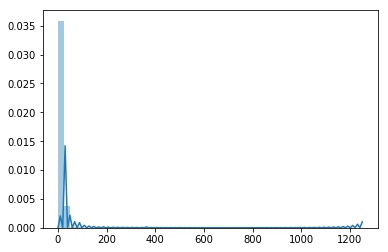

In [119]:
sns.distplot(x_array)
sns.distplot

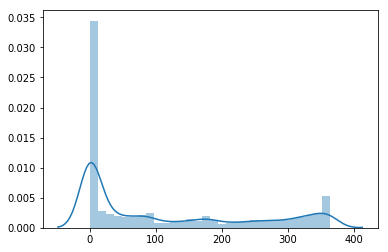

In [126]:
sns.distplot(x_array2)

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>

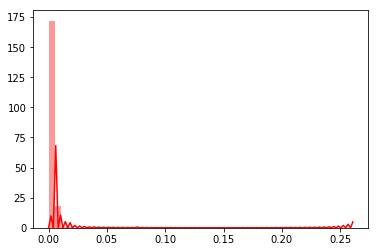

In [120]:
sns.distplot(normalized_x, color='red')
sns.distplot

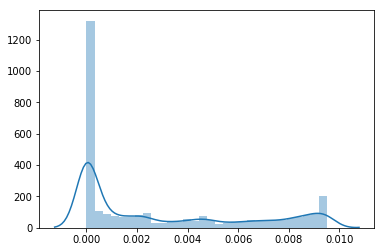

In [127]:
sns.distplot(normalized_x2)

<h3> Data Binning </h3> 

Text(0, 0.5, 'Count')

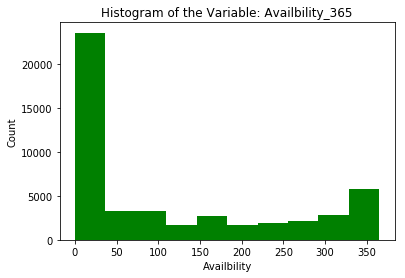

In [131]:
#Availability 365
import matplotlib as plt 
from matplotlib import pyplot 

plt.pyplot.hist(import_df['availability_365'], color='green')
plt.pyplot.title('Histogram of the Variable: Availbility_365')
plt.pyplot.xlabel ('Availbility')
plt.pyplot.ylabel ('Count')

As per the above, the Availability spread is not normal at all. In fact, there is a relatively high standard deviation. However, the variable can be binned into three separate bins: 
* Low Availibility
* Meidum Availibility 
* High Availibility

In [133]:
#Binning - Minimum Nights 
import_df['availability_365'] = import_df['availability_365'].astype('int', copy=True)

In [134]:
#Binning with numpy 
#Binning with linspace 

bins_avail = np.linspace(import_df['availability_365'].min(), import_df['availability_365'].max(),4)
bins_avail

array([  0.        , 121.66666667, 243.33333333, 365.        ])

In [135]:
#Creating our Categorization of the Bins 
#Creating the Availability_365 categorization 

avail_category_names = ['Low Availability', 'Medium Availability', 'High Availability']

In [136]:
#Creating a New column in our dataframe with the appropriate bins 
import_df['availability_365_binned'] = pd.cut(import_df['availability_365'], bins_avail, labels=avail_category_names, include_lowest = True)

In [142]:
#Creating an additional column in our dataframe that will also be representive of price 
import_df['price_for_minimum_nights'] = import_df['price'] * import_df['minimum_nights']

In [143]:
#Check our Data Frame 
import_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  2018-10-19   
1  Entire home/apt  225.0               1                 45  2019-05-21   
2     Private room  150.0               3                  0         NaN   
3  Entire home/apt   89.0               1                270  2019-07-05   
4  Entire home/apt   80.0              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   calculated_host_listing_count availability_365_binned  \
0                            6.0       High Availability   
1                            2.0       High Availability   
2                            1.0       High Availability   
3                            1.0     Medium Availability   
4                            1.0        Low Availability   

   price_for_minimum_nights  price_by_minimum_nights  
0                     149.0                    149.0  
1                     225.0                    225.0  
2                     450.0                    450.0  
3                      89.0                     89.0  
4                     800.0                    800.0

In [151]:
total_price_range=(import_df['price_for_minimum_nights'].max() - import_df['price_for_minimum_nights'].min())
total_price_range

1170000.0

[0, 1170000, 0, 48895]

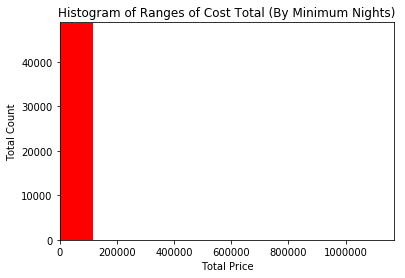

In [168]:
#Current Plot of the total price one would have to pay to stay in a room 
#Based of off price * minimum number of nights 

plt.pyplot.hist(import_df['price_for_minimum_nights'], color='red')

plt.pyplot.title('Histogram of Ranges of Cost Total (By Minimum Nights)')
plt.pyplot.xlabel('Total Price') 
plt.pyplot.ylabel('Total Count')

pyplot.axis([0, 1170000, 0, 48895])

In [189]:
#One more set of bins for price 
bins_pricetotal = np.linspace(import_df['price_for_minimum_nights'].min(), import_df['price_for_minimum_nights'].max(), 3)

In [190]:
#Label Names for price total 
minimum_price_total_labels = ['Low Minimum Price Total','High Minimum Price Total(Outliers)']

In [191]:
#Minimum Price Total Binned 
import_df['minimum_price_total_bins'] = pd.cut(import_df['price_for_minimum_nights'], bins_pricetotal, labels=minimum_price_total_labels,include_lowest=True)

In [192]:
import_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  ...  number_of_reviews  last_review  \
0     Private room  149.0  ...                  9   2018-10-19   
1  Entire home/apt  225.0  ...                 45   2019-05-21   
2     Private room  150.0  ...                  0          NaN   
3  Entire home/apt   89.0  ...                270   2019-07-05   
4  Entire home/apt   80.0  ...                  9   2018-11-19   

  reviews_per_month  calculated_host_listings_count  availability_365  \
0              0.21                               6               365   
1              0.38                               2               355   
2               NaN                               1               365   
3              4.64                               1               194   
4              0.10                               1                 0   

   calculated_host_listing_count  availability_365_binned  \
0                            6.0        High Availability   
1                            2.0        High Availability   
2                            1.0        High Availability   
3                            1.0      Medium Availability   
4                            1.0         Low Availability   

  price_for_minimum_nights  price_by_minimum_nights  minimum_price_total_bins  
0                    149.0                    149.0   Low Minimum Price Total  
1                    225.0                    225.0   Low Minimum Price Total  
2                    450.0                    450.0   Low Minimum Price Total  
3                     89.0                     89.0   Low Minimum Price Total  
4                    800.0                    800.0   Low Minimum Price Total  

[5 rows x 21 columns]

<h3> Some Initial Value Counts </h3> 

Now, that I have created some useful bins of the data, it would be great to see some of the total value counts for some of the variables that might be important to us later on. 

In [174]:
#Value Counts for our Availability Category 
import_df['availability_365_binned'].value_counts()

Low Availability       30637
High Availability      11475
Medium Availability     6783
Name: availability_365_binned, dtype: int64

Text(0.5, 0, 'Categorization of Availability')

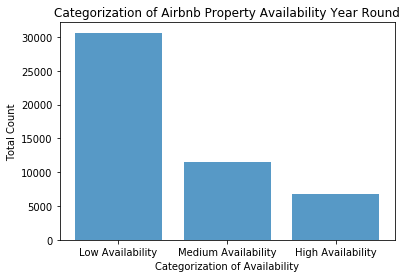

In [179]:
#Viszualization of our Availability Value Coutns 

plt.pyplot.bar(avail_category_names,import_df['availability_365_binned'].value_counts(),align='center', alpha=0.75 )

plt.pyplot.title ('Categorization of Airbnb Property Availability Year Round')
plt.pyplot.ylabel ('Total Count')
plt.pyplot.xlabel ('Categorization of Availability')


In [193]:
#Value Counts for Our Minimum_Total_Price Counts 
import_df['minimum_price_total_bins'].value_counts()
#As we can see most of the prices will fall under low minimum price

Low Minimum Price Total               48890
High Minimum Price Total(Outliers)        5
Name: minimum_price_total_bins, dtype: int64

<h3> One Hot Encoding: </h3> 

Eventually, after I analyze the data,  it could be of interest to develop a model to see how we can optimally predict prices for Airbnbs. In this case, it is imperative to look at any categorical variables that actually might be important for our model to eventually consider. In this case, a categorical variable that has a huge impact on price is <b> room type </b>. Due to this fact, it is important that our model will be able to actually interpret these values and make note of them. 

Because this variable is currently in string format, it will be important to perform the technique <b> one hot encoding </b> or get dummy variables for the unique values we have in <b> room type </b>. 

In [194]:
#Value Counts for Room Types 
import_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

It is clearly evident we will need to account for room type as it will significantly influence the price of the homes. We will set up <b> One Hot Encoding </b> for this variable.  

In [195]:
#Pandas Get Dummies 
#Come back to this 
pd.get_dummies(import_df['room_type'])

Entire home/apt  Private room  Shared room
0                    0             1            0
1                    1             0            0
2                    0             1            0
3                    1             0            0
4                    1             0            0
5                    1             0            0
6                    0             1            0
7                    0             1            0
8                    0             1            0
9                    1             0            0
10                   1             0            0
11                   0             1            0
12                   0             1            0
13                   0             1            0
14                   1             0            0
15                   1             0            0
16                   1             0            0
17                   0             1            0
18                   1             0            0
19                   1             0            0
20                   1             0            0
21                   0             1            0
22                   0             1            0
23                   0             1            0
24                   1             0            0
25                   0             1            0
26                   0             1            0
27                   1             0            0
28                   0             1            0
29                   1             0            0
...                ...           ...          ...
48865                0             1            0
48866                1             0            0
48867                0             0            1
48868                0             0            1
48869                0             1            0
48870                1             0            0
48871                0             1            0
48872                1             0            0
48873                1             0            0
48874                0             1            0
48875                0             1            0
48876                0             1            0
48877                0             1            0
48878                0             1            0
48879                1             0            0
48880                1             0            0
48881                0             1            0
48882                0             1            0
48883                0             1            0
48884                0             1            0
48885                0             1            0
48886                1             0            0
48887                1             0            0
48888                0             1            0
48889                0             1            0
48890                0             1            0
48891                0             1            0
48892                1             0            0
48893                0             0            1
48894                0             1            0

[48895 rows x 3 columns]

<h1 align=center><font size=6>Exploratory Data Analysis</font></h1>

In [197]:
#Brief Descriptive Statistics 
import_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  \
count                    48895.000000      48895.000000   
mean                         7.143982        112.781327   
std                         32.952519        131.622289   
min                          1.000000          0.000000   
25%                          1.000000          0.000000   
50%                          1.000000         45.000000   
75%                          2.000000        227.000000   
max                        327.000000        365.000000   

       calculated_host_listing_count  price_for_minimum_nights  \
count                   48895.000000              4.889500e+04   
mean                        7.143982              1.284433e+03   
std                        32.952519              1.180456e+04   
min                         1.000000              0.000000e+00   
25%                         1.000000              1.350000e+02   
50%                         1.000000              3.000000e+02   
75%                         2.000000              7.345000e+02   
max                       327.000000              1.170000e+06   

       price_by_minimum_nights  
count             4.889500e+04  
mean              1.284433e+03  
std               1.180456e+04  
min               0.000000e+00  
25%               1.350000e+02  
50%               3.000000e+02  
75%               7.345000e+02  
max               1.170000e+06

In [218]:
#Brief Descriptive Statistics 
import_df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].corr()

price  minimum_nights  number_of_reviews  \
price              1.000000        0.042799          -0.047954   
minimum_nights     0.042799        1.000000          -0.080116   
number_of_reviews -0.047954       -0.080116           1.000000   
reviews_per_month -0.030608       -0.121702           0.549868   
availability_365   0.081829        0.144303           0.172028   

                   reviews_per_month  availability_365  
price                      -0.030608          0.081829  
minimum_nights             -0.121702          0.144303  
number_of_reviews           0.549868          0.172028  
reviews_per_month           1.000000          0.185791  
availability_365            0.185791          1.000000

<h1> Data Visualization </h1> 

Looking deeper at some of the categorical variables in this dataset such as: 
* Neighbourhood_Group
* Neighbourhood 
* Room Type 


In [199]:
import matplotlib.pyplot as plt 
%matplotlib inline

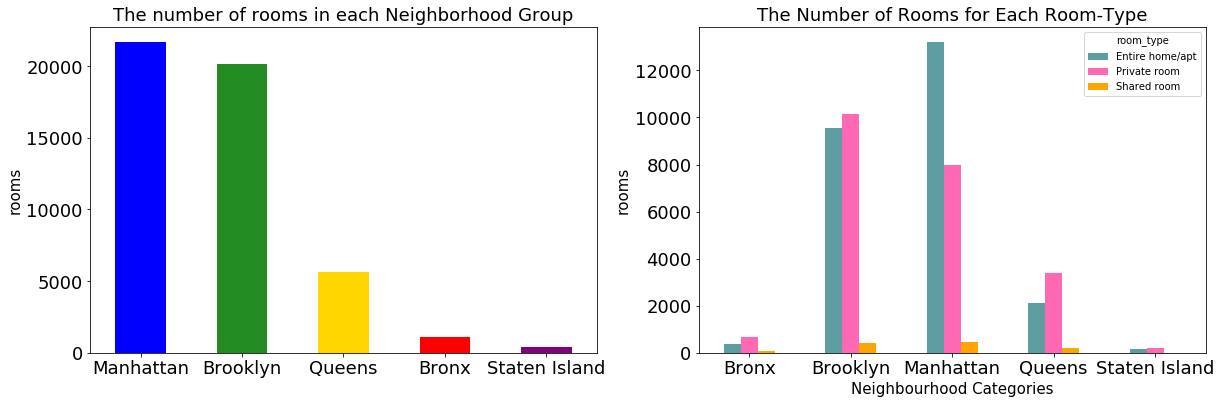

In [215]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
color = ('blue', 'forestgreen', 'gold', 'red','purple')
color2= ('cadetblue','hotpink','orange', 'darksalmon','brown')

import_df['neighbourhood_group'].value_counts().plot.bar(color=color,ax=ax[0])
ax[0].set_title('The number of rooms in each Neighborhood Group', size=18)
ax[0].set_ylabel('rooms', size=15)
ax[0].tick_params(axis='x', rotation=360)
ax[0].tick_params(labelsize=18)


import_df.groupby(['neighbourhood_group','room_type'])['id'].agg('count').unstack('room_type').plot.bar(color=color2,ax=ax[1])
ax[1].set_title('The Number of Rooms for Each Room-Type', size=18)
ax[1].set_ylabel('rooms', size=15)
ax[1].set_xlabel('Neighbourhood Categories', size=15)
ax[1].tick_params(axis='x', rotation=360)
ax[1].tick_params(labelsize=18)

In [216]:
#The Corresponding Counts for Figre 1A 
import_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [217]:
#The Correponding Counts for Figure 1B 
import_df.groupby(['neighbourhood_group','room_type'])['id'].agg('count')

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: id, dtype: int64

<h1> Box Plots </h1> 

Box Plots are a good way to visulize our data in order to find the range of where most of the data sits. They also do a good job at displaying outliers that occur in both the upper and lower extremes. With boxplots, we will be able to compare between different groups. 

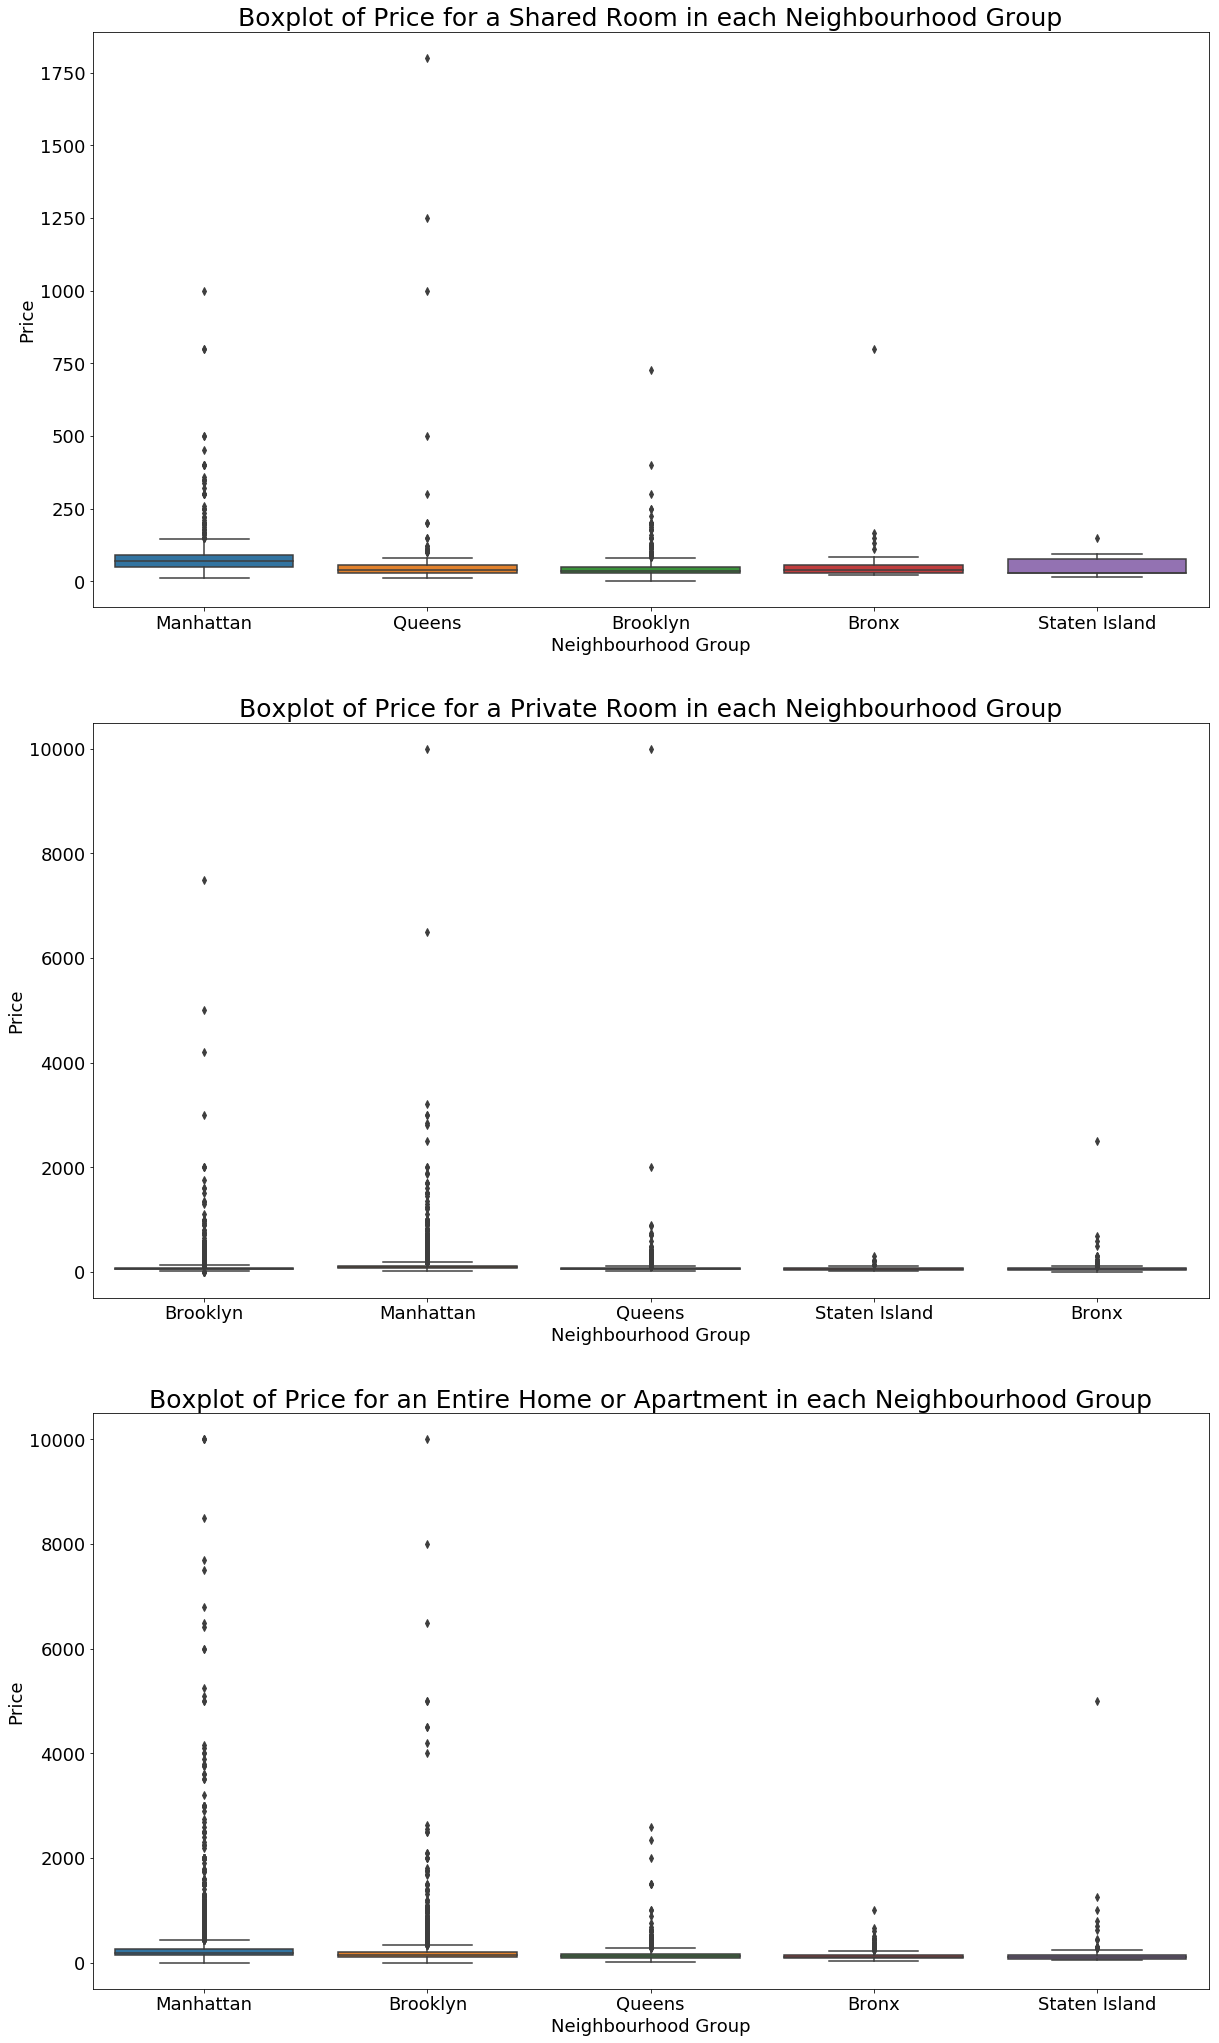

In [238]:
fig,ax=plt.subplots(3,1,figsize=(20,36))

#Boxplot 1 - Shared Room 
sns.boxplot(x="neighbourhood_group", y="price", data=import_df[import_df.room_type=='Shared room'],ax=ax[0])
ax[0].set_title("Boxplot of Price for a Shared Room in each Neighbourhood Group", size=25)
ax[0].set_ylabel('Price', size=18)
ax[0].set_xlabel('Neighbourhood Group', size=18)
ax[0].tick_params(labelsize=18)

#Boxplot 2 - Private Room 
sns.boxplot(x="neighbourhood_group", y="price", data=import_df[import_df.room_type=='Private room'], ax=ax[1])
ax[1].set_title("Boxplot of Price for a Private Room in each Neighbourhood Group", size=25)
ax[1].set_ylabel('Price', size=18)
ax[1].set_xlabel('Neighbourhood Group', size=18)
ax[1].tick_params(labelsize=18)

#Boxplot 3 - Entire Home or Apartment 
sns.boxplot(x="neighbourhood_group", y="price", data=import_df[import_df.room_type=='Entire home/apt'],ax=ax[2]) 
ax[2].set_title("Boxplot of Price for an Entire Home or Apartment in each Neighbourhood Group", size=25)
ax[2].set_ylabel('Price',size=18)
ax[2].set_xlabel('Neighbourhood Group', size=18)
ax[2].tick_params(labelsize=18)







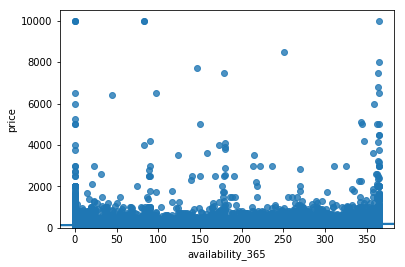

In [566]:
#Testing Correlation on some of our criteria 
sns.regplot(x='availability_365',y='price',data=import_df)
plt.ylim(0,)
plt.figsize=20,25

In [570]:
availability_price_correlation = import_df[['availability_365', 'price']].corr()
availability_price_correlation

availability_365     price
availability_365          1.000000  0.081829
price                     0.081829  1.000000

Poor correlation between availability and price 

In [267]:
#Shared Room 
upper_quartile_groupby = import_df.groupby(['neighbourhood_group','price','room_type']).quantile(0.75)
lower_quartile_groupby = import_df.groupby(['neighbourhood_group','price','room_type']).quantile(0.25)

In [252]:
upper_quartile = import_df[['neighbourhood_group','price']].quantile(.75)
lower_quartile = import_df[['neighbourhood_group', 'price']].quantile(0.25)

In [268]:
IQR = upper_quartile_groupby - lower_quartile_groupby
IQR 

0.75                                                 id       host_id  \
neighbourhood_group price  room_type                                    
Bronx               0.0    Private room            0.00  0.000000e+00   
                    10.0   Private room            0.00  0.000000e+00   
                    20.0   Shared room       5938808.25  6.993377e+07   
                    21.0   Private room            0.00  0.000000e+00   
                    22.0   Private room            0.00  0.000000e+00   
                           Shared room             0.00  0.000000e+00   
                    23.0   Private room            0.00  0.000000e+00   
                    24.0   Private room      1613760.00  4.996831e+07   
                    25.0   Private room      9355339.00  1.913555e+08   
                           Shared room       1388204.50  1.023341e+07   
                    26.0   Private room      7234528.00  5.983929e+07   
                           Shared room       1847804.00  1.777284e+07   
                    27.0   Private room       947144.00  1.196843e+08   
                    28.0   Entire home/apt         0.00  0.000000e+00   
                           Private room      9953884.50  6.511396e+07   
                           Shared room       5648112.25  1.442757e+08   
                    29.0   Private room      6026012.25  8.312543e+07   
                    30.0   Private room     10026723.50  1.144836e+08   
                    32.0   Shared room             0.00  0.000000e+00   
                    33.0   Private room     18306282.50  8.987853e+07   
                           Shared room             0.00  0.000000e+00   
                    34.0   Private room     11747652.25  1.468585e+08   
                    35.0   Entire home/apt         0.00  0.000000e+00   
                           Private room     12904562.25  1.384846e+08   
                           Shared room             0.00  0.000000e+00   
                    36.0   Private room       715496.50  9.479463e+07   
                           Shared room             0.00  0.000000e+00   
                    37.0   Entire home/apt         0.00  0.000000e+00   
                           Private room     19759137.50  1.178586e+08   
                    38.0   Private room     20350170.00  2.086072e+08   
...                                                 ...           ...   
Staten Island       150.0  Shared room             0.00  0.000000e+00   
                    155.0  Entire home/apt         0.00  0.000000e+00   
                    161.0  Entire home/apt         0.00  0.000000e+00   
                    165.0  Entire home/apt   5376402.50  5.278546e+07   
                    175.0  Entire home/apt  16529982.50  1.355944e+08   
                    180.0  Entire home/apt   5482300.00  5.861475e+07   
                    185.0  Entire home/apt         0.00  0.000000e+00   
                    190.0  Entire home/apt  17402357.00  4.323469e+07   
                    195.0  Entire home/apt  16005756.00  3.152664e+07   
                    199.0  Entire home/apt   5576691.50  6.068978e+06   
                    200.0  Entire home/apt  21024726.50  1.767546e+08   
                           Private room      2291020.00  5.836734e+07   
                    221.0  Entire home/apt         0.00  0.000000e+00   
                    235.0  Private room            0.00  0.000000e+00   
                    245.0  Entire home/apt         0.00  0.000000e+00   
                    249.0  Entire home/apt   3215863.50  6.838167e+07   
                    250.0  Entire home/apt    669597.50  3.257537e+06   
                    275.0  Entire home/apt   8905794.00  7.652154e+07   
                    289.0  Entire home/apt         0.00  0.000000e+00   
                    299.0  Entire home/apt  17109833.00  1.533971e+07   
                    300.0  Entire home/apt    429024.50  3.590148e+06   
                           Private room            0.00  0

<h3> Data Visualization for our predominant groups: </h3>

Because both Manhattan & Brooklyn are predominant groups that house most of the data: 
* <b> Manhattan:</b>  21,661 ~ 44.3 % 
* <b> Brooklyn:</b> 20,104 ~ 41.2 % 
* <b> Collectively </b> ~ 85.5 % 

I will focus on vizualizations specific to these two regions. 


In [281]:
import_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [286]:
#Unique Dataframe for Manhattan 
manhattan_df=import_df[import_df.neighbourhood_group=='Manhattan']
manhattan_df.head()

id                                              name  host_id  host_name  \
1  2595                             Skylit Midtown Castle     2845   Jennifer   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192      Laura   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322      Chris   
7  5178                  Large Furnished Room Near B'way      8967   Shunichi   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
1           Manhattan         Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan          Harlem  40.80902  -73.94190     Private room   
4           Manhattan     East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan     Murray Hill  40.74767  -73.97500  Entire home/apt   
7           Manhattan  Hell's Kitchen  40.76489  -73.98493     Private room   

   price  ...  number_of_reviews  last_review reviews_per_month  \
1  225.0  ...                 45   2019-05-21              0.38   
2  150.0  ...                  0          NaN               NaN   
4   80.0  ...                  9   2018-11-19              0.10   
5  200.0  ...                 74   2019-06-22              0.59   
7   79.0  ...                430   2019-06-24              3.47   

   calculated_host_listings_count  availability_365  \
1                               2               355   
2                               1               365   
4                               1                 0   
5                               1               129   
7                               1               220   

   calculated_host_listing_count  availability_365_binned  \
1                            2.0        High Availability   
2                            1.0        High Availability   
4                            1.0         Low Availability   
5                            1.0      Medium Availability   
7                            1.0      Medium Availability   

  price_for_minimum_nights  price_by_minimum_nights  minimum_price_total_bins  
1                    225.0                    225.0   Low Minimum Price Total  
2                    450.0                    450.0   Low Minimum Price Total  
4                    800.0                    800.0   Low Minimum Price Total  
5                    600.0                    600.0   Low Minimum Price Total  
7                    158.0                    158.0   Low Minimum Price Total  

[5 rows x 21 columns]

In [287]:
manhattan_df['neighbourhood'].unique()

array(['Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'West Village',
       'Chelsea', 'Inwood', 'East Village', 'Lower East Side', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Washington Heights',
       'Financial District', 'Morningside Heights', 'NoHo',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'Two Bridges', 'Nolita', 'Gramercy',
       'Theater District', 'Tribeca', 'Battery Park City', 'Civic Center',
       'Stuyvesant Town', 'Marble Hill'], dtype=object)

Text(0, 0.5, ' ')

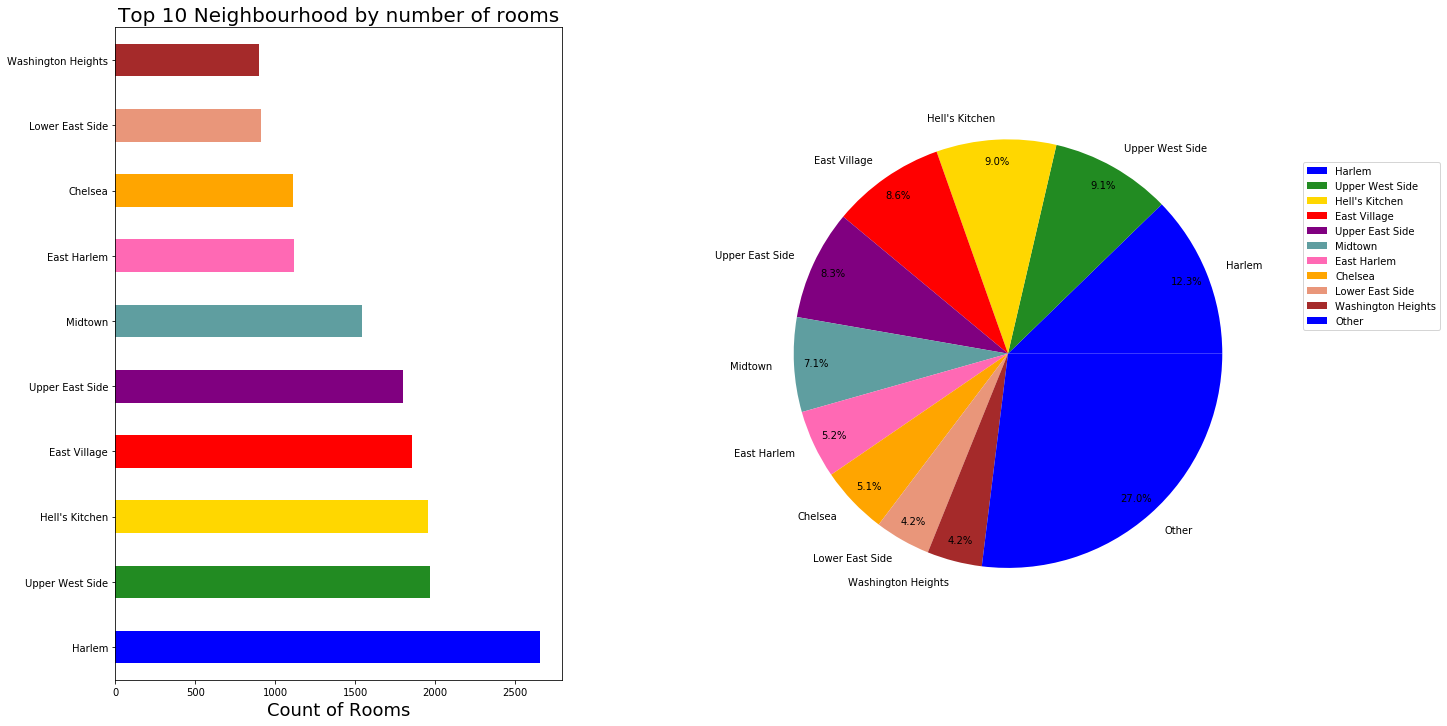

In [419]:
#Visualization for Manhattan Neighbourhood 
fig,ax=plt.subplots(1,2,figsize=(20,12))
color = ('blue', 'forestgreen', 'gold', 'red','purple','cadetblue','hotpink','orange', 'darksalmon','brown')

#Figure Number 1 
manhattan_df.neighbourhood.value_counts().sort_values(ascending=False)[:10].plot(kind='barh',color=color,ax=ax[0])
ax[0].set_title("Top 10 Neighbourhood by number of rooms",size=20)
ax[0].set_xlabel('Count of Rooms', size=18)

#Figure Number 2 
count = manhattan_df['neighbourhood'].value_counts()
groups = list (manhattan_df['neighbourhood'].value_counts().index)[:10]
counts = list(count[:10])
counts.append(count.agg(sum) - count[:10].agg('sum'))
groups.append('Other')

type_dict=pd.DataFrame({'group':groups,'counts':counts})
color1 = ('blue', 'forestgreen', 'gold', 'red','purple','cadetblue','hotpink','orange', 'darksalmon','brown')

qx=type_dict.plot(kind='pie',y='counts',labels=groups,colors=color1,autopct='%1.1f%%',pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.94))
plt.subplots_adjust(wspace=0.5,hspace=0)
plt.ylabel (" ")
          

In [299]:
!pip install folium

    100% |████████████████████████████████| 92kB 3.9MB/s ta 0:00:011


In [331]:
import folium as fol 
from folium import plugins

<h3> Visualization for the rooms with the price less than 65 per night in Manhattan </h3>  

In [316]:
manhattan_df.head()

id                                              name  host_id  host_name  \
1  2595                             Skylit Midtown Castle     2845   Jennifer   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192      Laura   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322      Chris   
7  5178                  Large Furnished Room Near B'way      8967   Shunichi   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
1           Manhattan         Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan          Harlem  40.80902  -73.94190     Private room   
4           Manhattan     East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan     Murray Hill  40.74767  -73.97500  Entire home/apt   
7           Manhattan  Hell's Kitchen  40.76489  -73.98493     Private room   

   price  ...  number_of_reviews  last_review reviews_per_month  \
1  225.0  ...                 45   2019-05-21              0.38   
2  150.0  ...                  0          NaN               NaN   
4   80.0  ...                  9   2018-11-19              0.10   
5  200.0  ...                 74   2019-06-22              0.59   
7   79.0  ...                430   2019-06-24              3.47   

   calculated_host_listings_count  availability_365  \
1                               2               355   
2                               1               365   
4                               1                 0   
5                               1               129   
7                               1               220   

   calculated_host_listing_count  availability_365_binned  \
1                            2.0        High Availability   
2                            1.0        High Availability   
4                            1.0         Low Availability   
5                            1.0      Medium Availability   
7                            1.0      Medium Availability   

  price_for_minimum_nights  price_by_minimum_nights  minimum_price_total_bins  
1                    225.0                    225.0   Low Minimum Price Total  
2                    450.0                    450.0   Low Minimum Price Total  
4                    800.0                    800.0   Low Minimum Price Total  
5                    600.0                    600.0   Low Minimum Price Total  
7                    158.0                    158.0   Low Minimum Price Total  

[5 rows x 21 columns]

In [317]:
manhattan_df_65 = manhattan_df[manhattan_df.price<65]

In [318]:
manhattan_df_65.head()

id                                          name  host_id  \
28   9518  SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM    31374   
30   9668                         front room/double bed    32294   
31   9704           Spacious 1 bedroom in luxe building    32045   
33   9783                           back room/bunk beds    32294   
39  12048           LowerEastSide apt share shortterm 1     7549   

          host_name neighbourhood_group    neighbourhood  latitude  longitude  \
28             Shon           Manhattan           Inwood  40.86482  -73.92106   
30  Ssameer Or Trip           Manhattan           Harlem  40.82245  -73.95104   
31             Teri           Manhattan           Harlem  40.81305  -73.95466   
33  Ssameer Or Trip           Manhattan           Harlem  40.82130  -73.95318   
39              Ben           Manhattan  Lower East Side  40.71401  -73.98917   

       room_type  price  ...  number_of_reviews  last_review  \
28  Private room   44.0  ...                108   2019-06-15   
30  Private room   50.0  ...                242   2019-06-01   
31  Private room   52.0  ...                 88   2019-06-14   
33  Private room   50.0  ...                273   2019-07-01   
39   Shared room   40.0  ...                214   2019-07-05   

   reviews_per_month  calculated_host_listings_count  availability_365  \
28              1.11                               3               311   
30              2.04                               3               355   
31              1.42                               1               255   
33              2.37                               3               359   
39              1.81                               4               188   

    calculated_host_listing_count  availability_365_binned  \
28                            3.0        High Availability   
30                            3.0        High Availability   
31                            1.0        High Availability   
33                            3.0        High Availability   
39                            4.0      Medium Availability   

   price_for_minimum_nights  price_by_minimum_nights  minimum_price_total_bins  
28                    132.0                    132.0   Low Minimum Price Total  
30                    150.0                    150.0   Low Minimum Price Total  
31                    104.0                    104.0   Low Minimum Price Total  
33                    150.0                    150.0   Low Minimum Price Total  
39                     40.0                     40.0   Low Minimum Price Total  

[5 rows x 21 columns]

In [326]:
manhattan_df_65['label']=manhattan_df.apply(lambda x: (x['name'],'price' + str (x['price'])),axis=1)

/Users/sahilkohli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [327]:
manhattan_df_65.head()

id                                          name  host_id  \
28   9518  SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM    31374   
30   9668                         front room/double bed    32294   
31   9704           Spacious 1 bedroom in luxe building    32045   
33   9783                           back room/bunk beds    32294   
39  12048           LowerEastSide apt share shortterm 1     7549   

          host_name neighbourhood_group    neighbourhood  latitude  longitude  \
28             Shon           Manhattan           Inwood  40.86482  -73.92106   
30  Ssameer Or Trip           Manhattan           Harlem  40.82245  -73.95104   
31             Teri           Manhattan           Harlem  40.81305  -73.95466   
33  Ssameer Or Trip           Manhattan           Harlem  40.82130  -73.95318   
39              Ben           Manhattan  Lower East Side  40.71401  -73.98917   

       room_type  price  ...  last_review  reviews_per_month  \
28  Private room   44.0  ...   2019-06-15               1.11   
30  Private room   50.0  ...   2019-06-01               2.04   
31  Private room   52.0  ...   2019-06-14               1.42   
33  Private room   50.0  ...   2019-07-01               2.37   
39   Shared room   40.0  ...   2019-07-05               1.81   

   calculated_host_listings_count  availability_365  \
28                              3               311   
30                              3               355   
31                              1               255   
33                              3               359   
39                              4               188   

    calculated_host_listing_count  availability_365_binned  \
28                            3.0        High Availability   
30                            3.0        High Availability   
31                            1.0        High Availability   
33                            3.0        High Availability   
39                            4.0      Medium Availability   

    price_for_minimum_nights price_by_minimum_nights  \
28                     132.0                   132.0   
30                     150.0                   150.0   
31                     104.0                   104.0   
33                     150.0                   150.0   
39                      40.0                    40.0   

    minimum_price_total_bins  \
28   Low Minimum Price Total   
30   Low Minimum Price Total   
31   Low Minimum Price Total   
33   Low Minimum Price Total   
39   Low Minimum Price Total   

                                                label  
28  (SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM,...  
30                 (front room/double bed, price50.0)  
31   (Spacious 1 bedroom in luxe building, price52.0)  
33                   (back room/bunk beds, price50.0)  
39   (LowerEastSide apt share shortterm 1, price40.0)  

[5 rows x 22 columns]

In [333]:
Long = -73.92 
Lat = 40.86 

manhattan_map_65=fol.Map([Lat,Long], zoom_start=12)
manhattan_rooms_map = plugins.MarkerCluster().add_to(manhattan_map_65)

for lat,lon,label in zip(manhattan_df_65.latitude,manhattan_df_65.longitude,manhattan_df_65.label):
    fol.Marker(location=[lat,lon],icon=None,popup=label).add_to(manhattan_rooms_map)
    
    manhattan_map_65.add_child(manhattan_rooms_map)
    
    manhattan_map_65

In [335]:
manhattan_map_65

<h3> Visualization for the rooms with the price between 65 and 80 per night in Manhattan </h3>  

In [394]:
manhattan_df_65_80=manhattan_df.loc[(manhattan_df['price'] >=65) & (manhattan_df['price'] <80)]
manhattan_df_65_80['label']=manhattan_df_65_80.apply(lambda x: (x['name'],'price:'+str(x['price'])),axis=1)
Long=-73.92
Lat=40.86

manhattan_65_80_map=fol.Map([Lat,Long],zoom_start=12)

manhattan_65_80_rooms_map=plugins.MarkerCluster().add_to(manhattan_65_80_map)
for lat,lon,label in zip(manhattan_df_65_80.latitude,manhattan_df_65_80.longitude,manhattan_df_65_80.label):
    fol.Marker(location=[lat,lon],icon=None,popup=label).add_to(manhattan_65_80_rooms_map)
manhattan_65_80_map.add_child(manhattan_65_80_rooms_map)

manhattan_65_80_map

/Users/sahilkohli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(0, 10500.328669611681)

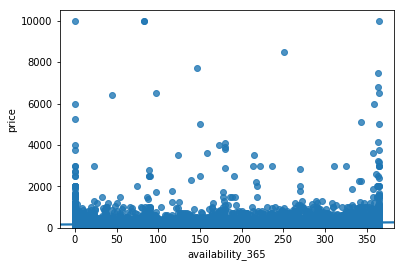

In [560]:
#Regression Plots 
sns.regplot(x='availability_365',y='price',data=manhattan_df)
plt.ylim(0,)

<h3> Analyzing the Data Through a Different Lens </h3> 

In [551]:
manhattan_df['availability_365_binned'].value_counts()

Low Availability       13557
High Availability       5110
Medium Availability     2994
Name: availability_365_binned, dtype: int64

In [582]:
import matplotlib as plt 
from matplotlib import pyplot

Text(0.5, 0, 'Categorization of Availability')

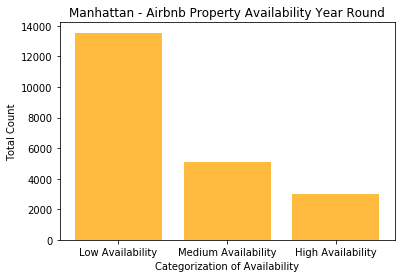

In [585]:
plt.pyplot.bar(avail_category_names,manhattan_df['availability_365_binned'].value_counts(),align='center', alpha=0.75,color='orange' )

plt.pyplot.title ('Manhattan - Airbnb Property Availability Year Round')
plt.pyplot.ylabel ('Total Count')
plt.pyplot.xlabel ('Categorization of Availability')

In [606]:
mean_byavail_manhattan = manhattan_df.groupby('availability_365_binned')['price'].mean()
round(mean_byavail_manhattan)

availability_365_binned
Low Availability       173.0
Medium Availability    221.0
High Availability      247.0
Name: price, dtype: float64

<h3> Visualizations for Brooklyn </h3>

In [501]:
#setup dataframe only for brooklyn 
brooklyn_df = import_df[import_df.neighbourhood_group=='Brooklyn']
brooklyn_df.head()

id                                            name  host_id  \
0   2539              Clean & quiet apt home by the park     2787   
3   3831                 Cozy Entire Floor of Brownstone     4869   
6   5121                                 BlissArtsSpace!     7356   
12  5803  Lovely Room 1, Garden, Best Area, Legal rental     9744   
15  6848                Only 2 stops to Manhattan studio    15991   

        host_name neighbourhood_group       neighbourhood  latitude  \
0            John            Brooklyn          Kensington  40.64749   
3     LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
6           Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
12         Laurie            Brooklyn         South Slope  40.66829   
15  Allen & Irina            Brooklyn        Williamsburg  40.70837   

    longitude        room_type  price  ...  number_of_reviews  last_review  \
0   -73.97237     Private room  149.0  ...                  9   2018-10-19   
3   -73.95976  Entire home/apt   89.0  ...                270   2019-07-05   
6   -73.95596     Private room   60.0  ...                 49   2017-10-05   
12  -73.98779     Private room   89.0  ...                167   2019-06-24   
15  -73.95352  Entire home/apt  140.0  ...                148   2019-06-29   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
3               4.64                               1               194   
6               0.40                               1                 0   
12              1.34                               3               314   
15              1.20                               1                46   

    calculated_host_listing_count  availability_365_binned  \
0                             6.0        High Availability   
3                             1.0      Medium Availability   
6                             1.0         Low Availability   
12                            3.0        High Availability   
15                            1.0         Low Availability   

   price_for_minimum_nights  price_by_minimum_nights  minimum_price_total_bins  
0                     149.0                    149.0   Low Minimum Price Total  
3                      89.0                     89.0   Low Minimum Price Total  
6                    2700.0                   2700.0   Low Minimum Price Total  
12                    356.0                    356.0   Low Minimum Price Total  
15                    280.0                    280.0   Low Minimum Price Total  

[5 rows x 21 columns]

In [502]:
brooklyn_df.shape

(20104, 21)

In [503]:
brooklyn_df['neighbourhood'].unique()

array(['Kensington', 'Clinton Hill', 'Bedford-Stuyvesant', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Greenpoint', 'Bushwick', 'Flatbush',
       'Prospect-Lefferts Gardens', 'Prospect Heights',
       'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands',
       'Cobble Hill', 'Boerum Hill', 'DUMBO', 'East Flatbush',
       'Gravesend', 'East New York', 'Sheepshead Bay', 'Fort Hamilton',
       'Bensonhurst', 'Sunset Park', 'Brighton Beach', 'Cypress Hills',
       'Bay Ridge', 'Columbia St', 'Vinegar Hill', 'Canarsie',
       'Borough Park', 'Downtown Brooklyn', 'Midwood', 'Red Hook',
       'Dyker Heights', 'Sea Gate', 'Navy Yard', 'Brownsville',
       'Manhattan Beach', 'Bergen Beach', 'Coney Island', 'Bath Beach',
       'Mill Basin'], dtype=object)

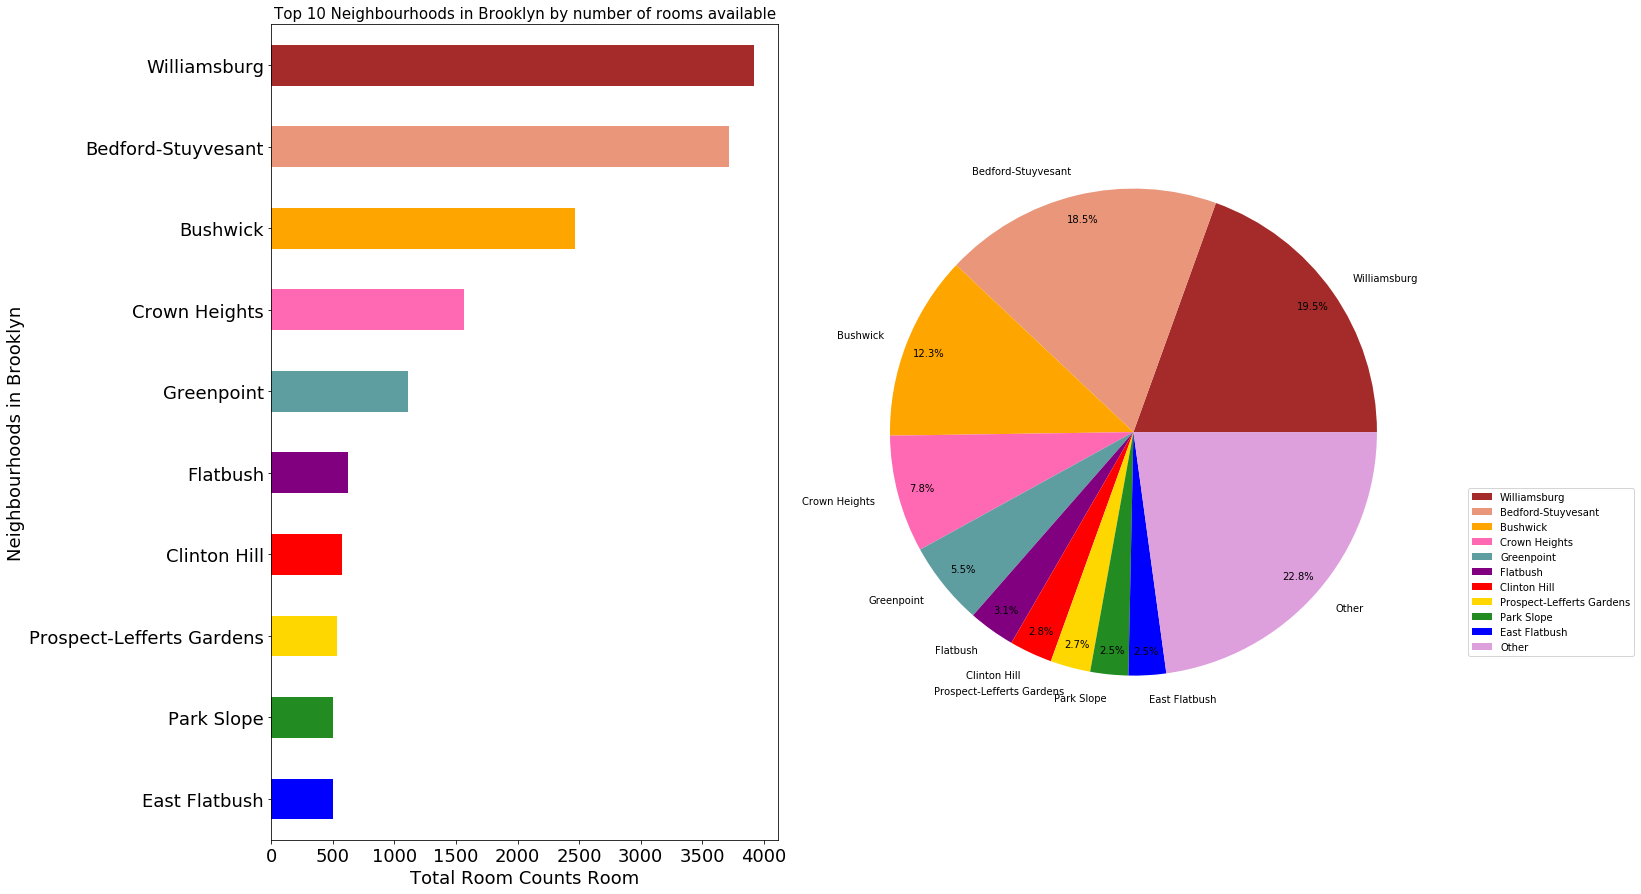

In [504]:
#Visualization 
fig, ax = plt.subplots(1,2,figsize=(20,15))
color =  ('blue', 'forestgreen', 'gold', 'red','purple','cadetblue','hotpink','orange', 'darksalmon','brown')

#Plotting on Axis 0 (1)
#Breaking this down - Steps: 
#1. Specify What Column in Brooklyn Df 
#2. Specify Total Value Counts for all entities in neighbourhood column 
#3. Specify Sort those Values by ascending 
#4. Sort All these Values [:10] uptil 10 then sort_values again [:10].sort_values().
#5. [:10].sort_values().plot(kind='barh', color=color, ax=ax[0])

#Figure 1 
brooklyn_df['neighbourhood'].value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', color=color, ax=ax[0])
ax[0].set_title("Top 10 Neighbourhoods in Brooklyn by number of rooms available", size=15)
ax[0].set_ylabel('Neighbourhoods in Brooklyn', size=18)
ax[0].set_xlabel('Total Room Counts Room',size=18)
ax[0].tick_params(axis='x', rotation=360)
ax[0].tick_params(labelsize=18)

#Figure2
count=brooklyn_df['neighbourhood'].value_counts() #will display all value counts - neighbourhood + number of rooms of all neighbourhoods(unique)
groups=list(brooklyn_df['neighbourhood'].value_counts().index)[:10] #will display the top neighbourhoods in a list without the actual count
counts=list(count[:10]) #will take the counts (number only) of top 10 from the counts variable 
counts.append(count.agg(sum) - count[:10].agg('sum'))
groups.append('Other')

type_dict=pd.DataFrame({"group":groups,"counts":counts})
color1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx1=type_dict.plot(kind='pie',y='counts',labels=groups,colors=color1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.2, hspace =0)
plt.ylabel('')

ax[1].tick_params(labelsize=10)

In [609]:
#Looking At Availability 
brooklyn_df['availability_365_binned'].value_counts()

Low Availability       13478
High Availability       4084
Medium Availability     2542
Name: availability_365_binned, dtype: int64

Text(0.5, 0, 'Categorization of Availability')

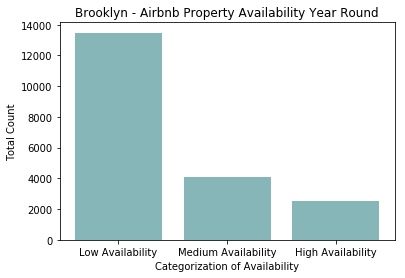

In [612]:
plt.pyplot.bar(avail_category_names,brooklyn_df['availability_365_binned'].value_counts(),align='center', alpha=0.75,color='cadetblue' )

plt.pyplot.title ('Brooklyn - Airbnb Property Availability Year Round')
plt.pyplot.ylabel ('Total Count')
plt.pyplot.xlabel ('Categorization of Availability')

In [537]:
brooklyn_df_10_65=brooklyn_df.loc[(brooklyn_df['price'] >=10) & (brooklyn_df['price'] <65)][:2000]


In [538]:
brooklyn_df_10_65['label']=brooklyn_df_65_125.apply(lambda x: (x['name'],'price:'+str(x['price'])),axis=1)


In [539]:
brooklyn_df_10_65.head()

id                                name  host_id host_name  \
6    5121                     BlissArtsSpace!     7356     Garon   
25   8505  Sunny Bedroom Across Prospect Park    25326   Gregory   
32   9782   Loft in Williamsburg Area w/ Roof    32169    Andrea   
36  11452         Clean and Quiet in Brooklyn     7355        Vt   
58  15338     Room in Greenpoint Loft w/ Roof    32169    Andrea   

   neighbourhood_group       neighbourhood  latitude  longitude     room_type  \
6             Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596  Private room   
25            Brooklyn     Windsor Terrace  40.65599  -73.97519  Private room   
32            Brooklyn          Greenpoint  40.72219  -73.93762  Private room   
36            Brooklyn  Bedford-Stuyvesant  40.68876  -73.94312  Private room   
58            Brooklyn          Greenpoint  40.72401  -73.93788  Private room   

    price  ...  last_review  reviews_per_month calculated_host_listings_count  \
6    60.0  ...   2017-10-05               0.40                              1   
25   60.0  ...   2019-06-23               1.37                              2   
32   55.0  ...   2019-06-15               1.65                              3   
36   35.0  ...          NaN                NaN                              1   
58   49.0  ...   2019-06-04               1.19                              3   

    availability_365  calculated_host_listing_count  availability_365_binned  \
6                  0                            1.0         Low Availability   
25                85                            2.0         Low Availability   
32               284                            3.0        High Availability   
36               365                            1.0        High Availability   
58               320                            3.0        High Availability   

    price_for_minimum_nights price_by_minimum_nights  \
6                     2700.0                  2700.0   
25                      60.0                    60.0   
32                     220.0                   220.0   
36                    2100.0                  2100.0   
58                     196.0                   196.0   

    minimum_price_total_bins                                             label  
6    Low Minimum Price Total                     (BlissArtsSpace!, price:60.0)  
25   Low Minimum Price Total  (Sunny Bedroom Across Prospect Park, price:60.0)  
32   Low Minimum Price Total   (Loft in Williamsburg Area w/ Roof, price:55.0)  
36   Low Minimum Price Total         (Clean and Quiet in Brooklyn, price:35.0)  
58   Low Minimum Price Total     (Room in Greenpoint Loft w/ Roof, price:49.0)  

[5 rows x 22 columns]

In [540]:
brooklyn_df_10_65.shape

(2000, 22)

In [541]:
#Setting up the visualization 

Long = -73.94
Lat = 40.72 

#Setting up a map variable 
brooklyn_10_65_map = fol.Map([Lat,Long],zoom_start=12) 
brooklyn_10_65_rooms_map = plugins.MarkerCluster().add_to(brooklyn_10_65_map)
for lat,lon,label in zip(brooklyn_df_10_65.latitude, brooklyn_df_10_65.longitude, brooklyn_df_10_65.label): 
    fol.Marker(location=[lat,lon], icon=None, popup=label).add_to(brooklyn_10_65_rooms_map)
    brooklyn_10_65_map.add_child(brooklyn_10_65_rooms_map)


In [542]:
brooklyn_10_65_map

In [471]:
queens_df=import_df[import_df.neighbourhood_group=='Queens']

In [472]:
queens_df.head()

id                                               name  host_id  \
46   12937  1 Stop fr. Manhattan! Private Suite,Landmark B...    50124   
77   18198                              Little King of Queens    70091   
143  32363                 Fully Furnished Basement Apartment   140025   
161  39593            A room w/ a Manhattan view, longer stay   110506   
181  45910                 Beautiful Queens Brownstone! - 5BR   204539   

    host_name neighbourhood_group     neighbourhood  latitude  longitude  \
46    Orestes              Queens  Long Island City  40.74771  -73.94740   
77     Justin              Queens          Woodside  40.75038  -73.90334   
143    Fredah              Queens          Flushing  40.74028  -73.83168   
161     Myung              Queens         Sunnyside  40.74559  -73.92313   
181      Mark              Queens         Ridgewood  40.70382  -73.89797   

           room_type  price  ...  number_of_reviews  last_review  \
46      Private room  130.0  ...                248   2019-07-01   
77      Private room   70.0  ...                 25   2019-05-31   
143     Private room  140.0  ...                  1   2011-09-19   
161     Private room   79.0  ...                 28   2019-04-12   
181  Entire home/apt  350.0  ...                 10   2019-05-12   

    reviews_per_month  calculated_host_listings_count  availability_365  \
46               2.25                               1               215   
77               0.22                               1               324   
143              0.01                               1                 1   
161              0.26                               1               126   
181              0.11                               5               365   

     calculated_host_listing_count  availability_365_binned  \
46                             1.0      Medium Availability   
77                             1.0        High Availability   
143                            1.0         Low Availability   
161                            1.0      Medium Availability   
181                            5.0        High Availability   

    price_for_minimum_nights  price_by_minimum_nights  \
46                     390.0                    390.0   
77                    2100.0                   2100.0   
143                    280.0                    280.0   
161                   2370.0                   2370.0   
181                   2800.0                   2800.0   

     minimum_price_total_bins  
46    Low Minimum Price Total  
77    Low Minimum Price Total  
143   Low Minimum Price Total  
161   Low Minimum Price Total  
181   Low Minimum Price Total  

[5 rows x 21 columns]

In [473]:
queens_df.shape

(5666, 21)

In [516]:
queens_df['neighbourhood'].unique()

array(['Long Island City', 'Woodside', 'Flushing', 'Sunnyside',
       'Ridgewood', 'Jamaica', 'Middle Village', 'Ditmars Steinway',
       'Astoria', 'Queens Village', 'Rockaway Beach', 'Forest Hills',
       'Elmhurst', 'Jackson Heights', 'St. Albans', 'Rego Park',
       'Briarwood', 'Ozone Park', 'East Elmhurst', 'Arverne',
       'Cambria Heights', 'Bayside', 'Kew Gardens', 'College Point',
       'Glendale', 'Richmond Hill', 'Bellerose', 'Maspeth', 'Woodhaven',
       'Kew Gardens Hills', 'Bay Terrace', 'Whitestone', 'Bayswater',
       'Fresh Meadows', 'Springfield Gardens', 'Howard Beach',
       'Belle Harbor', 'Jamaica Estates', 'Far Rockaway',
       'South Ozone Park', 'Corona', 'Neponsit', 'Laurelton',
       'Holliswood', 'Rosedale', 'Edgemere', 'Jamaica Hills', 'Hollis',
       'Douglaston', 'Little Neck', 'Breezy Point'], dtype=object)

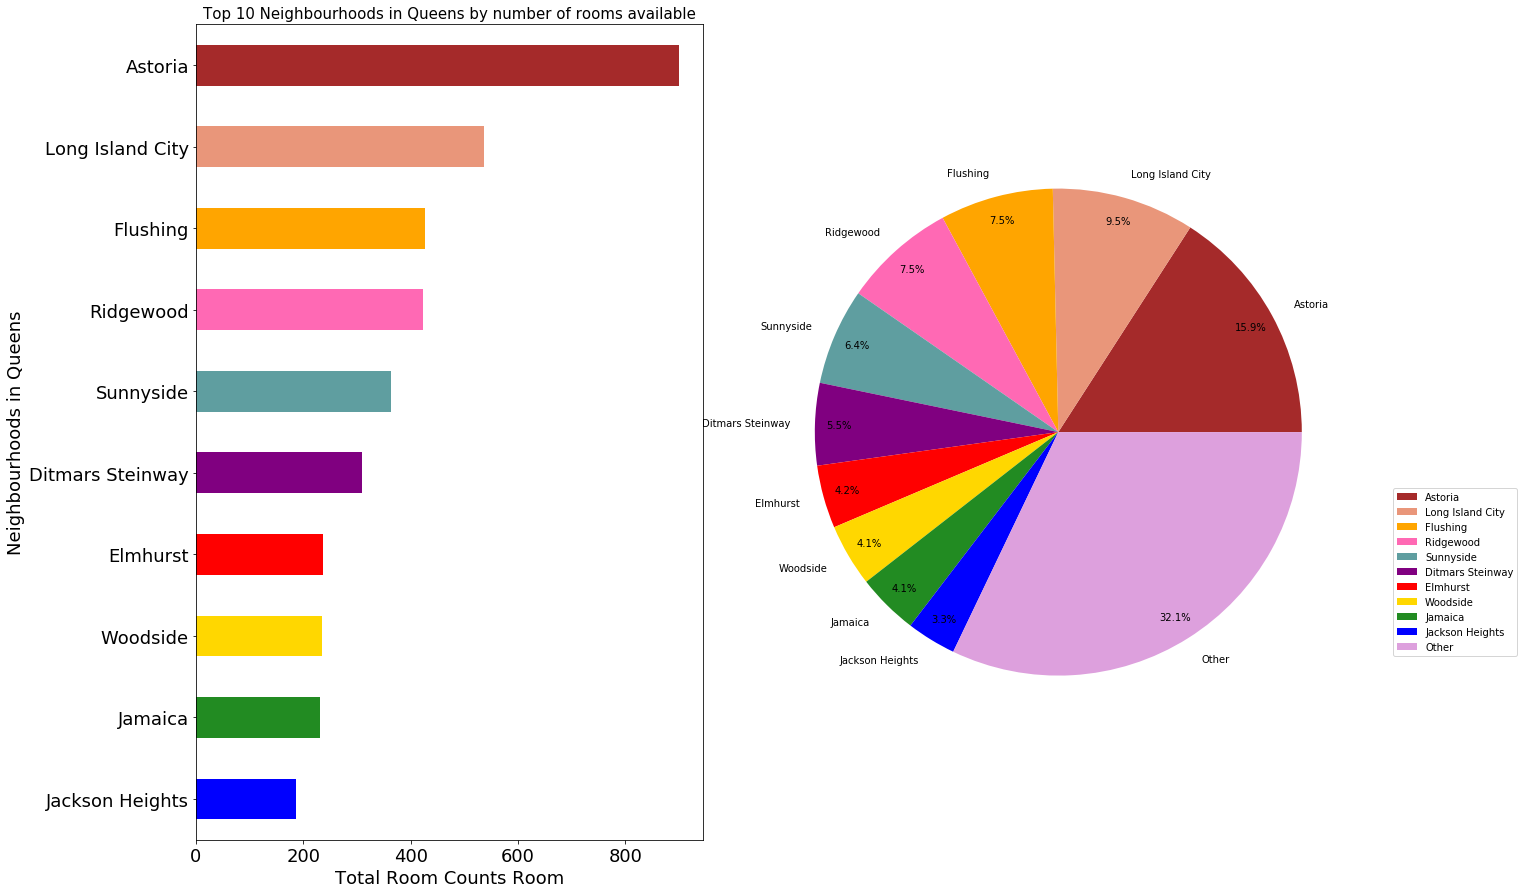

In [517]:
#Visualization for Queens 
fig, ax = plt.subplots(1,2,figsize=(20,15))
color =  ('blue', 'forestgreen', 'gold', 'red','purple','cadetblue','hotpink','orange', 'darksalmon','brown')

#Plotting on Axis 0 (1)
#Breaking this down - Steps: 
#1. Specify What Column in Brooklyn Df 
#2. Specify Total Value Counts for all entities in neighbourhood column 
#3. Specify Sort those Values by ascending 
#4. Sort All these Values [:10] uptil 10 then sort_values again [:10].sort_values().
#5. [:10].sort_values().plot(kind='barh', color=color, ax=ax[0])

#Figure 1 
queens_df['neighbourhood'].value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', color=color, ax=ax[0])
ax[0].set_title("Top 10 Neighbourhoods in Queens by number of rooms available", size=15)
ax[0].set_ylabel('Neighbourhoods in Queens', size=18)
ax[0].set_xlabel('Total Room Counts Room',size=18)
ax[0].tick_params(axis='x', rotation=360)
ax[0].tick_params(labelsize=18)

#Figure2
count=queens_df['neighbourhood'].value_counts() #will display all value counts - neighbourhood + number of rooms of all neighbourhoods(unique)
groups=list(queens_df['neighbourhood'].value_counts().index)[:10] #will display the top neighbourhoods in a list without the actual count
counts=list(count[:10]) #will take the counts (number only) of top 10 from the counts variable 
counts.append(count.agg(sum) - count[:10].agg('sum'))
groups.append('Other')

type_dict=pd.DataFrame({"group":groups,"counts":counts})
color1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx1=type_dict.plot(kind='pie',y='counts',labels=groups,colors=color1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.2, hspace =0)
plt.ylabel('')

ax[1].tick_params(labelsize=10)

In [614]:
queens_df['availability_365_binned'].value_counts()

Low Availability       2963
High Availability      1725
Medium Availability     978
Name: availability_365_binned, dtype: int64

Text(0.5, 0, 'Categorization of Availability')

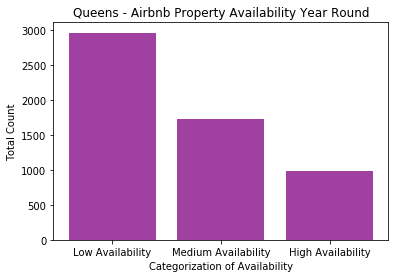

In [616]:
plt.pyplot.bar(avail_category_names,queens_df['availability_365_binned'].value_counts(),align='center', alpha=0.75,color='purple' )

plt.pyplot.title ('Queens - Airbnb Property Availability Year Round')
plt.pyplot.ylabel ('Total Count')
plt.pyplot.xlabel ('Categorization of Availability')

In [519]:
queens_df['price'].mean()

99.51764913519237

In [545]:
queens_df_sub_100 = queens_df.loc[(queens_df['price']<=100)][:2000]

In [546]:
queens_df_sub_100['label']=queens_df_sub_100.apply(lambda x: (x['name'],'price:'+str(x['price'])),axis=1)


In [547]:
#Setting up the visualization 

Long = -73.80
Lat = 40.70

#Setting up a map variable 
queens_data_map_sub100 = fol.Map([Lat,Long],zoom_start=12) 
queens_data_room_map_sub100 = plugins.MarkerCluster().add_to(queens_data_map_sub100)
for lat,lon,label in zip(queens_df_sub_100.latitude, queens_df_sub_100.longitude, queens_df_sub_100.label): 
    fol.Marker(location=[lat,lon], icon=None, popup=label).add_to(queens_data_room_map_sub100)
    queens_data_map_sub100.add_child(queens_data_room_map_sub100)

In [548]:
queens_data_map_sub100

<h1> Correlation in Color: Heat Map </h1> 

In [617]:
#Though this is useful, correlation information might be more practical in a visual diagram.
import_df.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   
calculated_host_listing_count   0.133272  0.154950  0.019517  -0.114713   
price_for_minimum_nights        0.003796  0.002250  0.012169  -0.039108   
price_by_minimum_nights         0.003796  0.002250  0.012169  -0.039108   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.030608       -0.121702           0.549868   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   
calculated_host_listing_count   0.057472        0.127960          -0.072376   
price_for_minimum_nights        0.444553        0.386293          -0.031563   
price_by_minimum_nights         0.444553        0.386293          -0.031563   

                                reviews_per_month  \
id                                       0.291828   
host_id                                  0.296417   
latitude                                -0.010142   
longitude                                0.145948   
price                                   -0.030608   
minimum_nights                          -0.121702   
number_of_reviews                        0.549868   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009421   
availability_365                         0.185791   
calculated_host_listing_count           -0.009421   
price_for_minimum_nights                -0.043391   
price_by_minimum_nights                 -0.043391   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.009421   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   
calculated_host_listing_count                         1.000000   
price_for_minimum_nights                              0.054855   
price_by_minimum_nights                               0.054855   

                                availability_365  \
id                                      0.085468   
host_id                                 0.203492   
latitude                               -0.010983   
long

In [624]:
#Deleting a repeat column
import_df.drop(columns = ['price_by_minimum_nights'], axis = 1, inplace=True)

In [625]:
import_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  2018-10-19   
1  Entire home/apt  225.0               1                 45  2019-05-21   
2     Private room  150.0               3                  0         NaN   
3  Entire home/apt   89.0               1                270  2019-07-05   
4  Entire home/apt   80.0              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   calculated_host_listing_count availability_365_binned  \
0                            6.0       High Availability   
1                            2.0       High Availability   
2                            1.0       High Availability   
3                            1.0     Medium Availability   
4                            1.0        Low Availability   

   price_for_minimum_nights minimum_price_total_bins  
0                     149.0  Low Minimum Price Total  
1                     225.0  Low Minimum Price Total  
2                     450.0  Low Minimum Price Total  
3                      89.0  Low Minimum Price Total  
4                     800.0  Low Minimum Price Total

In [618]:
import matplotlib.pyplot as plt 

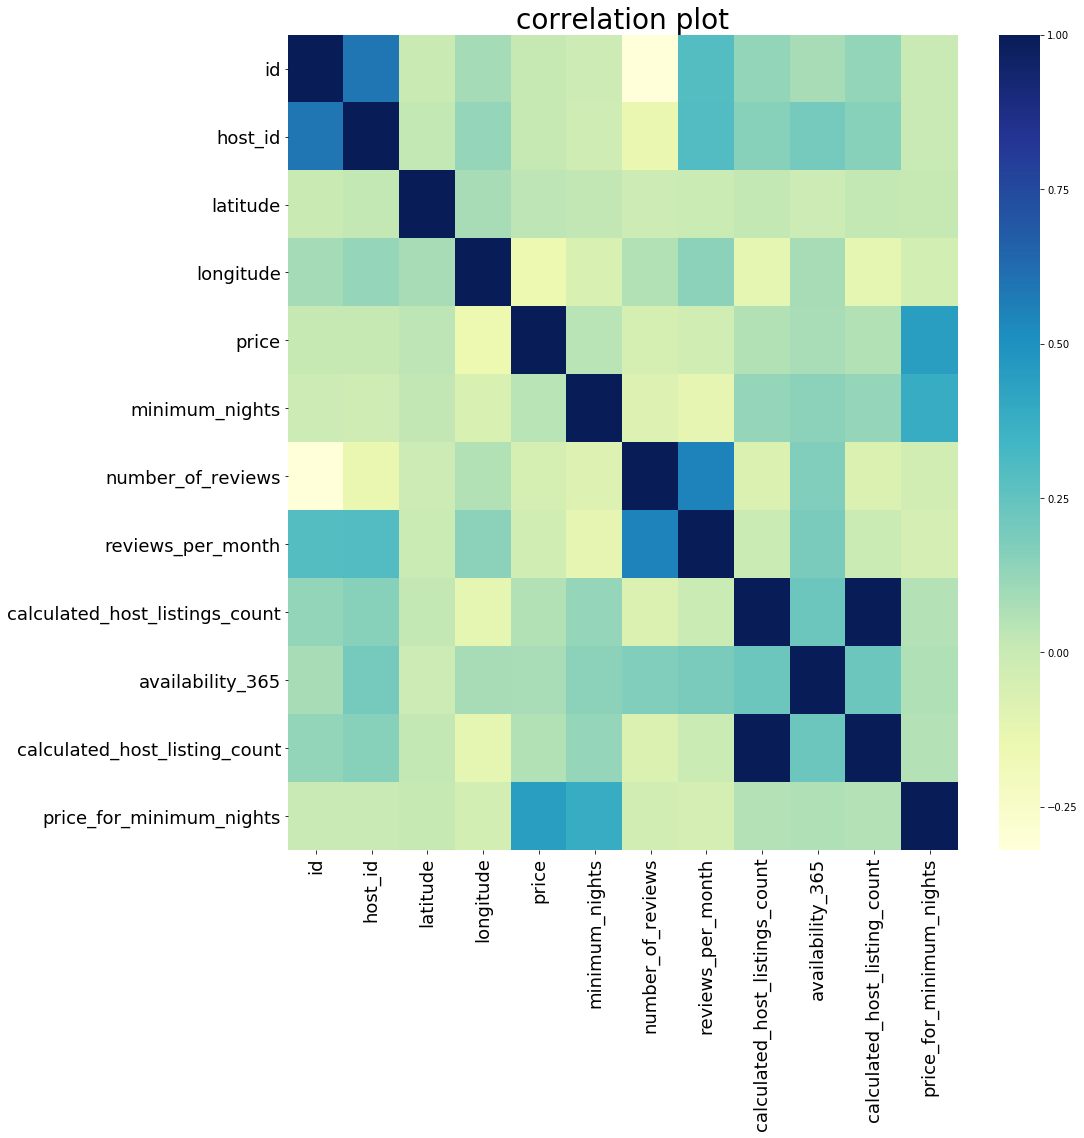

In [626]:
plt.figure(figsize=(15,15))
corr=import_df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap="YlGnBu")

plt.title("correlation plot", size=28)
plt.tick_params(labelsize=18)

As evident from the graph above, it seems as though the variables in this dataset are better suited for visualization rather than prediction or modeling. The correlations are not strong enough to develop an accurate, worthwhile model. 

In [629]:
import_df[['price','minimum_nights']].corr()

price  minimum_nights
price           1.000000        0.042799
minimum_nights  0.042799        1.000000

<h1> Data Visualization Complete </h1> 

In [ ]:
coffee_temperature = float(input("What temperature would you like (in degrees) ?")), "or if you're feeling lucky...",  str(input("or if you're feeling lucky...would you like a random temperature: Y,N ?  "))

In [636]:
import_df.to_csv('New York City Airbnb Dataset Cleaned')